# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data= pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

пропущены значения в следующих столбцах: 
ceiling_height(высота потолков) - можно заполнить медианным значением 
floors_total (этажей в доме) - вероятно пропущенные значения могут говорить о том что в доме 1 этаж(необходимо проверить) living_area(жилая площадь)-очень важный показатель. пропуски могут говорить об ошибки при заполнении, либо что квартира под категорией апартаменты. 
is_apartment - изменить тип данных 
kitchen_area(площадь кухни) - кухня не отделена(кухня гостиная, апартаменты) balcony (балкон) - отсутствие значения говорит об отсутствии балкона(заменить на 0) 
locality_name (название населенного пункта) - ошибка заполнения или ошибка выгрузки. Скорее всего придется удалить значения) airports_nearest (расстояние до аэропорта) - вероятно, в определённой зоне аэропорта нет) 
cityCenters_nearest(расстояние до центра) - может находится в центре населенного пункта?? 
parks_around3000 - нет парков на расстоянии 3 км parks_nearest - нет парков в определяемой зоне 
ponds_around3000 - нет водоемов ponds_nearest нет водоемов 
days_exposition - объявление еще не снято??

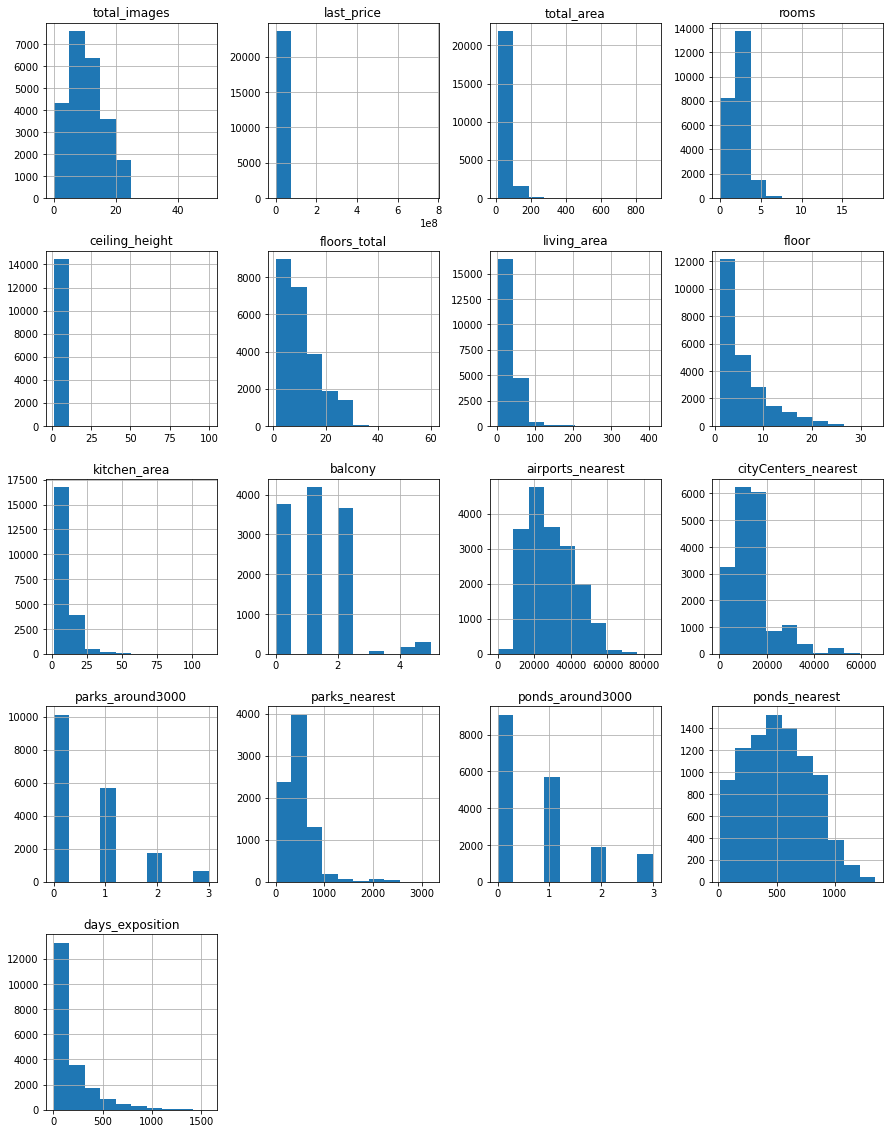

In [3]:
data.hist(figsize=(15, 20));


### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 ceiling_height(высота потолков) - можно заполнить медианным значением

In [5]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

floors_total (этажей в доме) - вероятно пропущенные значения могут говорить о том что в доме 1 этаж(необходимо проверить)
нужно проанализировать на каких этажах находятся квартиры. 

In [6]:
data[data['floors_total'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Теория не подтвердилась. Оставляем данные без заполнения.

living_area(жилая площадь)-очень важный показатель. пропуски могут говорить об ошибки при заполнении, либо что квартира под категорей аппартаменты. 

In [7]:
data[data['living_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Теория не подтвердилась, однако нужно обратить внимание, что у некоторых объявлений кроме общей площади не укзано деление на жилую и кухню, это говорит о неполном заполнении или ошибка выгрузки. 

is_apartment - столбец по заданию с булевым типом. нужно заменить тип данных и вместо пропусков поставить False, посколку если данный параметр не указывался при заполнении данных можно предположить, что это утверждение ложно. 

In [8]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

balcony (балкон) - отсутствие значения говоит об отсутствии балкона(заменить на 0) 
'floors_total', 'living_area', 'kitchen_area' - заменим на медианное значение в целом, поскольку они не зависят от региона
cityCenters_nearest, parks_nearest, ponds_nearest, airports_nearest, days_exposition - заменим на средее группируя по населенному пункту, поскольку они сильно зависят от региона. 


In [10]:
b = ['balcony', 'parks_around3000', 'ponds_around3000']
data[b] = data[b].fillna(0)

a = ['floors_total'] #'living_area', 'kitchen_area' ]
data[a]=data[a].fillna(data[a].median())


In [11]:
#f = ['cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'airports_nearest', 'days_exposition']
#for f1 in f:
    #for F in data['locality_name'].unique():
        #data.loc[(data['locality_name'] == F) & (data[f1].isna()), f1] = \
        #data.loc[(data['locality_name'] == F), f1].mean()
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Поскольку получилось заполнить не все пропуски, вероятно в некоторых населенный пунктах не заполнялись(или не выгрузились данные) по растояниям до изучаемых объектов

#### ТИПЫ ДАННЫХ

Необходимо заменить типы данных у следующих столбцов:
first_day_exposition - на временной
last_price - на целый, маловероятно, что кто то указывает цену с копейками
floors_total - не может иметь дробное значение
balcony- не может иметь дробное значение
parks_around3000- не может иметь дробное значение
days_exposition- не может иметь дробное значение
ponds_around3000- не может иметь дробное значение


In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['last_price'].astype('int')
data['floors_total'].astype('int')
data['balcony'].astype('int')
data['parks_around3000'].astype('int')
data['ponds_around3000'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### ПОИСК НЕЯВНЫХ ДУБЛИКАТОВ

In [13]:
print(data['locality_name'].sort_values().unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

In [14]:
c = ['городской поселок','поселок городского типа', 'посёлок', 'посёлок городского типа'] #поселок
d = ['посёлок при железнодорожной станции', 'посёлок станции'] #поселок станции
for d1 in d:
    data['locality_name']=data['locality_name'].str.replace(d1,'поселок станции',regex=True)
for c1 in c:
    data['locality_name']=data['locality_name'].str.replace(c1,'поселок',regex=True)
data=data.dropna(subset = ['locality_name']).reset_index(drop=True)
print(data['locality_name'].sort_values().unique())


['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Будогощь'
 'городской поселок Виллози' 'городской поселок Лесогорский'
 'городской поселок Мга' 'городской поселок Назия'
 'городской поселок Новоселье' 'городской поселок Павлово'
 'городской поселок Рощино' 'городской поселок Свирьстрой'
 'городской поселок Советский' 'городской поселок Фёдоровское'
 'городской поселок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревня Белогорка'
 'деревня Большая Вруда' 'деревня Большая Пустомер

#### ПРОВЕРКА ВЫПОДАЮЩИХ ЗНАЧЕНИЙ

In [15]:
print(data['balcony'].sort_values().unique())

[0. 1. 2. 3. 4. 5.]


In [16]:
print(data['ceiling_height'].sort_values().unique())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

In [17]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height']/10)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']>= 2.5, 2.5)

data['ceiling_height'].sort_values().unique()

array([ 2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,
        2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,
        2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,
        2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,
        2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,
        2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,
        3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,
        3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,
        3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,
        3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,
        3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,
        3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,
        3.6 ,  3.62,  3.63,  3.65,  3.66,  3.67,  3.68,  3.69,  3.7 ,
        3.75,  3.76,  3.78,  3.8 ,  3.82,  3.83,  3.84,  3.85,  3.86,
        3.87,  3.88,

высота потолков по требованиям снип не может быть ниже 2,5 м, в связи с этим все значения ниже 2,5 заменены на 2,5 м. слишком высокие значения (более 10 метров) были поделены на 10,(видимо люди заполняя объявление не поставли ",") и в случае если полученное значение оказывалось пеньше 2,5 оно также заменялось. 

In [18]:
data['cityCenters_nearest'].sort_values().unique()

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

In [19]:
print(data['days_exposition'].sort_values().unique())

[1.000e+00 2.000e+00 3.000e+00 ... 1.572e+03 1.580e+03       nan]


In [20]:
print(data['floor'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


In [21]:
print(data['floors_total'].sort_values().unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.]


In [22]:
data['kitchen_area'].sort_values().unique()
data.sort_values(by='kitchen_area', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20178,2,85000000.0,249.7,2018-02-01,3,2.65,10.0,72.0,9,False,...,107.0,4.0,Санкт-Петербург,31532.0,4624.0,1.0,2218.0,2.0,99.0,26.0
2487,9,12500000.0,255.0,2017-04-21,3,2.65,2.0,153.9,2,False,...,100.7,0.0,Санкт-Петербург,29544.0,6916.0,0.0,NaN,3.0,198.0,102.0
5349,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
16212,5,82400000.0,181.1,2017-05-24,3,3.90,9.0,58.2,4,False,...,93.2,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0
16767,9,65850000.0,146.0,2017-07-14,2,2.65,9.0,40.0,3,False,...,93.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,77.0
10849,1,56844500.0,177.9,2015-01-15,3,2.65,6.0,87.2,5,True,...,87.2,0.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,False,...,77.0,0.0,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
4387,20,57000000.0,174.0,2015-11-09,3,3.20,10.0,95.0,6,False,...,77.0,0.0,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
14619,17,47000000.0,150.0,2017-02-28,4,3.70,6.0,58.0,5,False,...,75.0,1.0,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0


In [23]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [24]:
data['living_area'].sort_values().unique()
data.sort_values(by='living_area', ascending = True).head(10)
data.sort_values(by='living_area', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
5349,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
12382,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
4230,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.0,3,False,...,22.0,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
12840,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,False,...,26.4,0.0,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
8004,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
14065,8,51000000.0,402.0,2017-02-07,6,3.15,8.0,300.0,6,False,...,56.0,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0
20236,12,20000000.0,460.8,2019-03-20,6,3.10,3.0,279.6,1,False,...,55.5,0.0,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
22448,7,91075000.0,491.0,2017-05-27,5,4.20,9.0,274.0,9,False,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0


In [25]:
liv = data['living_area'].median() /data['total_area'].median() 
data['living_area'] = data['living_area'].where(data['living_area']> 10, (data['living_area'] * liv))

Минимальные значения жилой площади похоже на ошибку введения, они были заменены на средний по всем объявлениям процент от общей. 

In [26]:
data['parks_around3000'].sort_values().unique()

array([0., 1., 2., 3.])

In [27]:
data['ponds_around3000'].sort_values().unique()

array([0., 1., 2., 3.])

In [28]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [29]:
data.sort_values(by='rooms', ascending = False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14473,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,...,27.6,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18815,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5349,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,16.6,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20789,6,28659000.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
19505,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
9672,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,11.9,0.0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,13.3,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
18858,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,...,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
4144,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,...,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN


In [30]:
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [31]:
data['total_images'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

[ 12.   13.   13.2 ... 631.  631.2 900. ]


(0.0, 400.0)

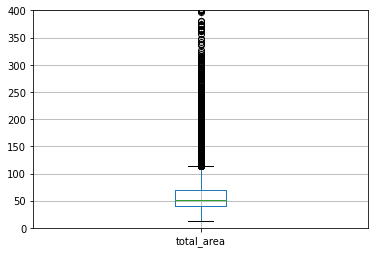

In [32]:
print(data['total_area'].sort_values().unique())
import matplotlib.pyplot as plt
data.boxplot(column = 'total_area')
plt.ylim(0,400)


по ящику определяется, что выподают значения больше 150 кв метров. Пробуем убрать данные значения

In [33]:
data = data[data['total_area'] <= 150]
data.shape[0]

23088

In [34]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 8.500e+07, 1.220e+08,
       1.240e+08])

(0.0, 50000000.0)

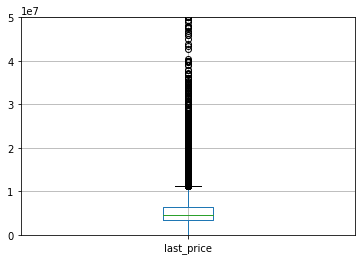

In [35]:
data.boxplot(column = 'last_price')
plt.ylim(0,50000000)

по ящику определяется, что выподают значения больше 15 млн рублей, однако, стоимость квартир в Санкт-Петербурге сильно выше чем в других регионах, и при отбросе большого количества значений мы рискуем убрать все значения из Санкт-Петербург.  Пробуем убрать значения с сильно завышеной ценой, боле 50 млн. (75 % от всез значений по группировке по Санкт-Петербургу.)
Также при укрупнении ящика отмечается что выбросы минимальной цены до 350 т рублей. 

In [36]:
data = data[(data['last_price'] <= 50000000) & (data['last_price'] >= 350000)]
data.shape[0]

23068

In [37]:
data['rooms'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

<AxesSubplot:>

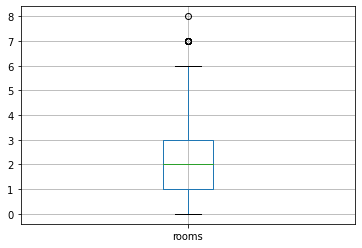

In [38]:
data.boxplot(column = 'rooms')

по ящику определяется, что сильно выподают значения больше 6 комнат. Пробуем убрать данные значения

In [39]:
data = data[data['rooms'] <= 6]
data.shape[0]

23059

Рассмотрим минимальное значение комнат

In [40]:
r0 = data[data['rooms'] == 0]
r0['total_area'].describe()

count    196.000000
mean      27.536276
std        8.368574
min       15.500000
25%       24.037500
50%       26.025000
75%       28.325000
max       98.400000
Name: total_area, dtype: float64

Судя по полученным данным, можно предположить, что в данных не указали или не выгрузилось количество комнат. судя по средним показателям столбца с общей площадью,количество комнат можно заменить на "1".

In [41]:
data['rooms'] = data['rooms'].where(data['rooms'] != 0, 1)
data['rooms'].sort_values().unique()

array([1, 2, 3, 4, 5, 6])

### Посчитайте и добавьте в таблицу новые столбцы

In [42]:
data['square_meter_price']=round(data['last_price']/data['total_area'],2)
data['day_week'] = data['first_day_exposition'].dt.weekday
data['publ_month'] = data['first_day_exposition'].dt.month
data['publ_year'] = data['first_day_exposition'].dt.year
data['floor_type'] = data['floor'].where(data['floor'] != 1, 'первый')
data['floor_type'] = data['floor_type'].where(data['floor'] != data['floors_total'] , 'последний')
data['floor_type'] = data['floor_type'].where((data['floor_type'] == 'первый') | (data['floor_type'] =='последний'), 'другой')
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)
                     


In [43]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,day_week,publ_month,publ_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,0.0,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,0.0,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23059 entries, 0 to 23649
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23059 non-null  int64         
 1   last_price              23059 non-null  float64       
 2   total_area              23059 non-null  float64       
 3   first_day_exposition    23059 non-null  datetime64[ns]
 4   rooms                   23059 non-null  int64         
 5   ceiling_height          23059 non-null  float64       
 6   floors_total            23059 non-null  float64       
 7   living_area             21230 non-null  float64       
 8   floor                   23059 non-null  int64         
 9   is_apartment            23059 non-null  bool          
 10  studio                  23059 non-null  bool          
 11  open_plan               23059 non-null  bool          
 12  kitchen_area            20860 non-null  float6

### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов:

##### общая площадь;

count    23059.000000
mean        56.439577
std         22.806823
min         12.000000
25%         40.000000
50%         51.000000
75%         67.575000
max        150.000000
Name: total_area, dtype: float64


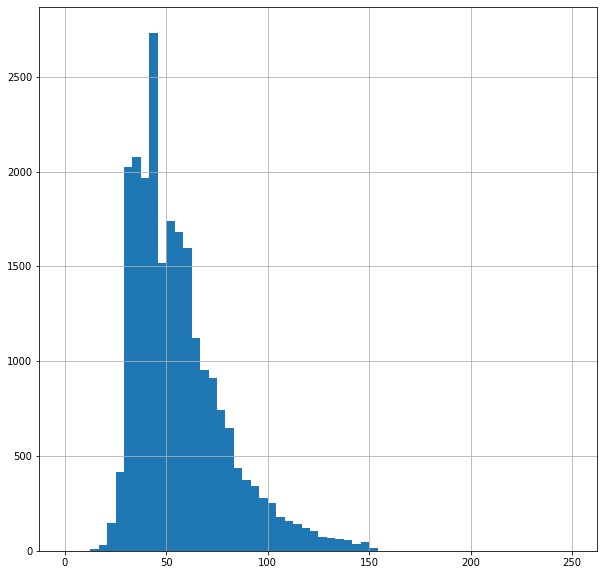

In [45]:
data['total_area'].hist(bins = 60, range = (0, 250), figsize = (10,10))
print(data['total_area'].describe())

Наблюдается распределение Пуассона. Гистограмма без отклонений. Отмечается значительный пик количества объявлений о продаже квартир около 45 кв метров. Думаю, что это связано с особенностью человеческого мышления округлять значения(пример 42 и 46 кв м записывали в 45), либо со стандартной площадью 2ух комнатных квартир около 45 кв.м.

##### жилая площадь;

count    21230.000000
mean        32.264240
std         15.353187
min          1.153846
25%         18.500000
50%         30.000000
75%         41.500000
max        128.000000
Name: living_area, dtype: float64


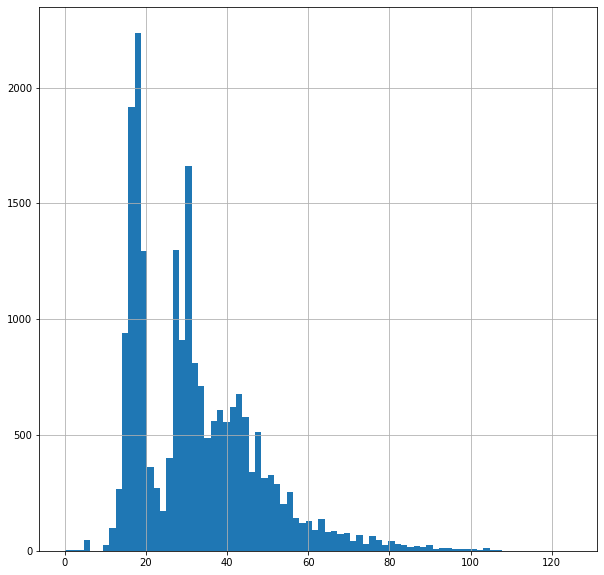

In [46]:
data['living_area'].hist(bins = 80, range = (0, 125), figsize = (10,10))
print(data['living_area'].describe())

Распределение больше напоминает нормальное, однако 2 выбивающихся пика могут говорить о стандартности строений многоэтажных домов. Стандартная жилая площадь для самых "ходовых" квартир(1 и 2ух комнатных или студий)

##### площадь кухни;

count    20860.000000
mean        10.189154
std          4.907429
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         75.000000
Name: kitchen_area, dtype: float64


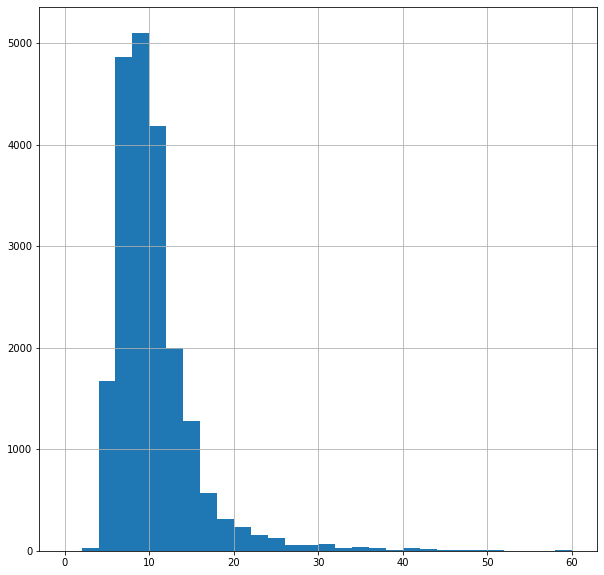

In [47]:
data['kitchen_area'].hist(bins = 30, range = (0, 60), figsize = (10,10))
print(data['kitchen_area'].describe())

Наиболее популярная площадь кухни около 10 кв.м

##### цена объекта;

count    2.305900e+04
mean     5.639155e+06
std      4.100916e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.575000e+06
75%      6.500000e+06
max      5.000000e+07
Name: last_price, dtype: float64


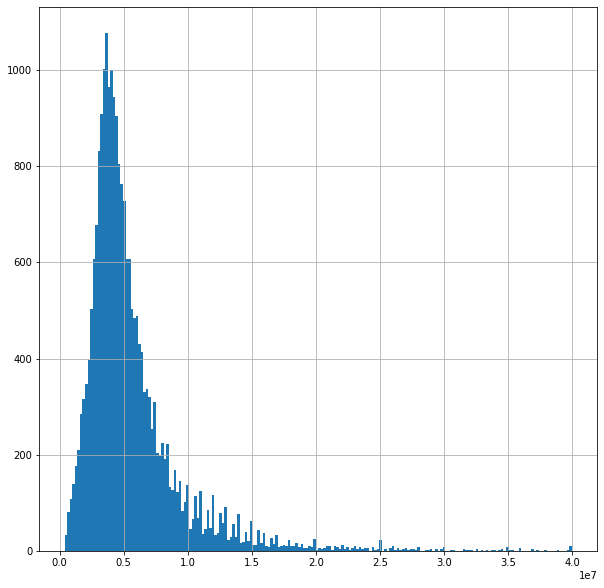

In [48]:
data['last_price'].hist(bins = 200, figsize = (10,10), range = (400000, 40000000))
print(data['last_price'].describe())

Согласно данным в большинстве квартиры стоят от 3 млн.рублей до 7 млн.рублей

##### количество комнат;

count    23059.000000
mean         2.005681
std          0.930918
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


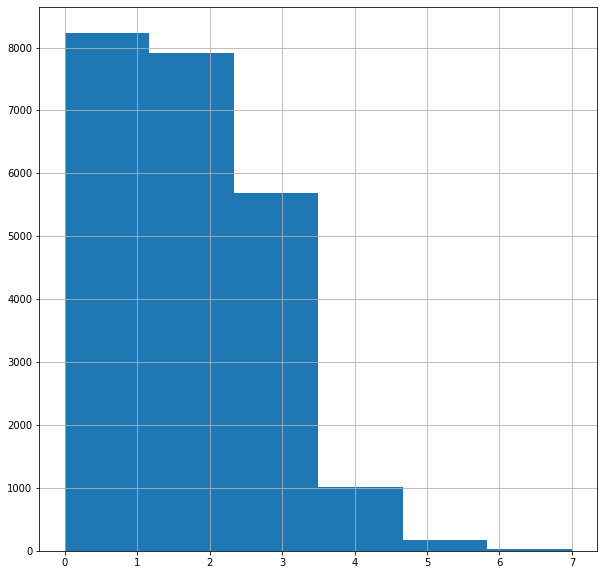

In [49]:
data['rooms'].hist(bins = data['rooms'].max(), figsize = (10,10), range = (0, (data['rooms'].max()+1)))
print(data['rooms'].describe())

Как предполагалось выше, наиболее популярные объявления о продаже однокомнатных и двухкомнатных квартир.

##### высота потолков

count    23059.000000
mean         2.689343
std          0.219630
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


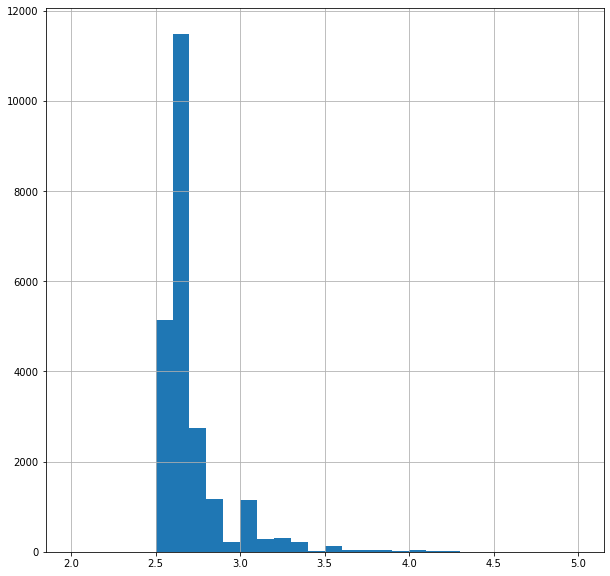

In [50]:
data['ceiling_height'].hist(bins = 30, figsize = (10,10), range = (2, 5))
print(data['ceiling_height'].describe())

как и ожидалось, самая массовая высота потолков стандартные 2,6 - 2,7 м

##### этаж квартиры

count    23059.000000
mean         5.902945
std          4.897912
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


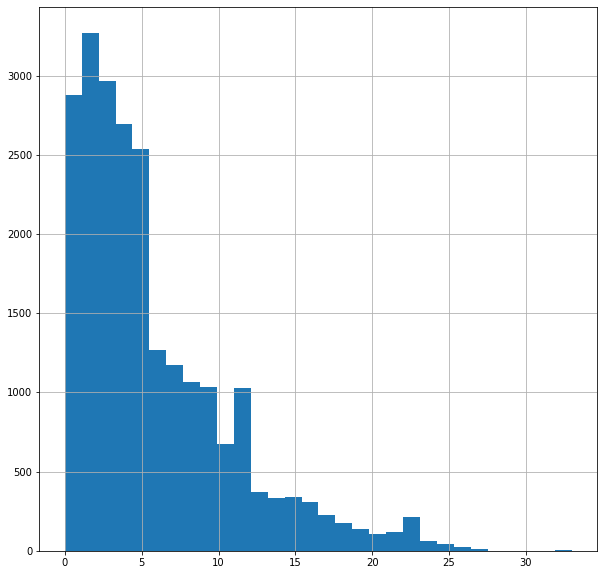

In [51]:
data['floor'].hist(bins = 30, figsize = (10,10), range = (0, 33
                                                         ))
print(data['floor'].describe())

самые популярные этажи для России до 5, поскольку большая распространенность пятиэтажек.

##### тип этажа квартиры

count      23059
unique         3
top       другой
freq       17002
Name: floor_type, dtype: object


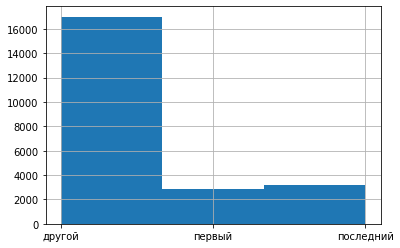

In [52]:
data['floor_type'].hist(bins = 3)
print(data['floor_type'].describe())

Соотношение объявлений о продаже квартир на первом и последнем этаже приблизительно равны. 

##### общее количество этажей в доме

count    23059.000000
mean        10.741056
std          6.606753
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


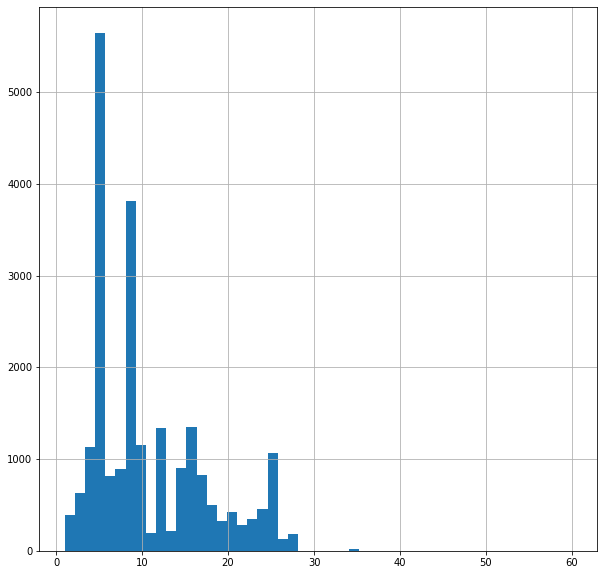

In [53]:
data['floors_total'].hist(bins = 50, figsize = (10,10))
print(data['floors_total'].describe())

Самые популярные дома для России это безусловно пяти и девятиэтажки. Гистограмма это подтверждает. 

##### расстояние до центра города в метрах;

count    17566.000000
mean     14422.893544
std       8560.302457
min        208.000000
25%       9719.000000
50%      13242.000000
75%      16419.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


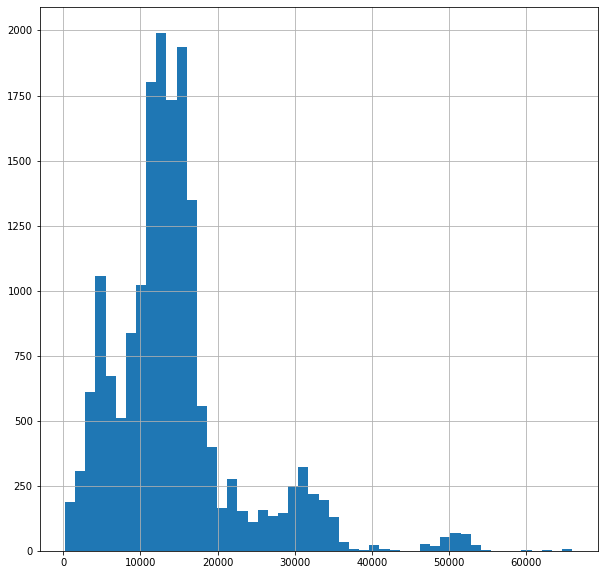

In [54]:
data['cityCenters_nearest'].hist(bins = 50, figsize = (10,10))
print(data['cityCenters_nearest'].describe())

наибольшее количество квартир находятся на расстоянии от 10 до 17 км от центра города.

##### расстояние до ближайшего аэропорта;

count    17546.000000
mean     28855.735267
std      12747.807769
min          0.000000
25%      18433.500000
50%      26903.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64


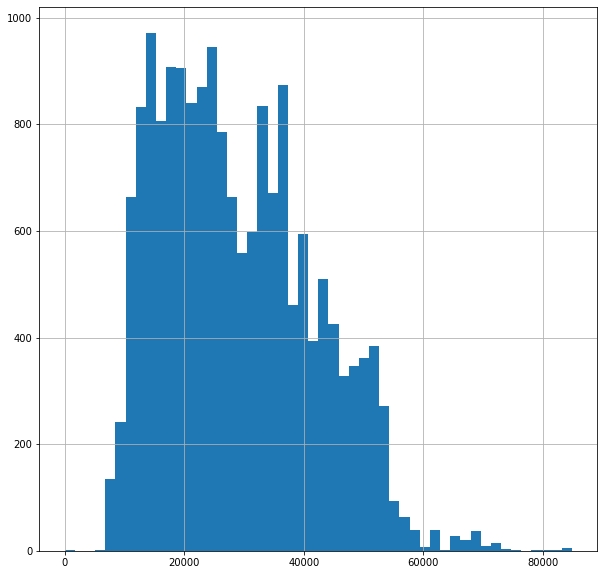

In [55]:
data['airports_nearest'].hist(bins = 50, figsize = (10,10))
print(data['airports_nearest'].describe())

наибольшее количество квартир находятся на расстоянии от 10 до 30 км от ближайшего аэропорта.

##### расстояние до ближайшего парка;

count    7671.000000
mean      493.976014
std       344.062549
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


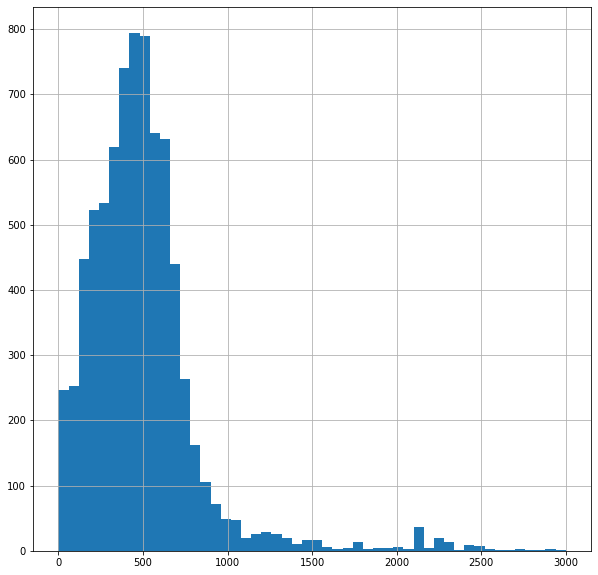

In [56]:
data['parks_nearest'].hist(bins = 50, figsize = (10,10),  range = (0, 3000))
print(data['parks_nearest'].describe())

Большая часть квартир находятся на расстоянии 500 м от парка. 

##### день и месяц публикации объявления

<AxesSubplot:>

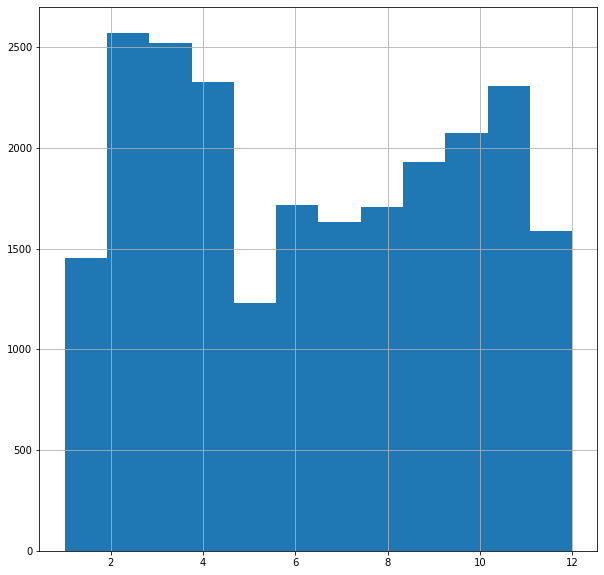

In [57]:
data['publ_month'].hist(bins = 12, figsize = (10,10))

Наиболее часто люди задумываются о продаже квартир в конце зимы и начале весны, а летом и в начале осени им не до продажи квартир. в октябре ноябре предложение квартир увеличивается, однако на новогодние праздники сильно снижается. 

<AxesSubplot:>

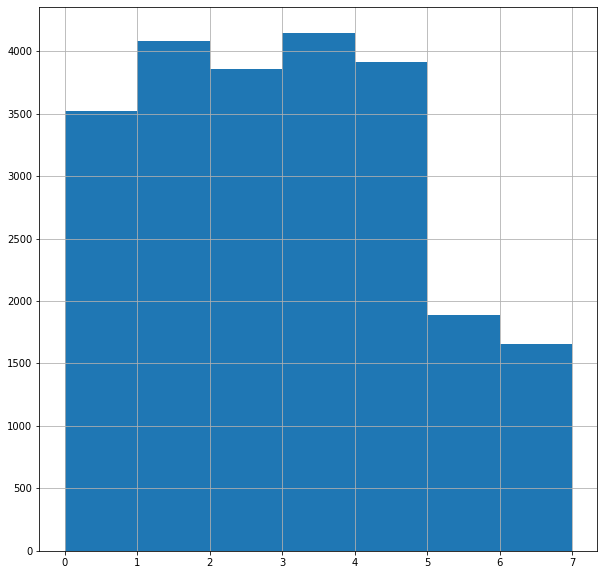

In [58]:
data['day_week'].hist(bins = 7, figsize = (10,10),  range = (0, 7))

В Выходные дни реже появляются объявления о продаже квартир. Вероятно, что большую часть объявлений выкладывают агенты по продажже квартир, у которых выходные в сб и вс

#### Как быстро продаются квартиры 

count    20031.000000
mean       178.032450
std        217.134444
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


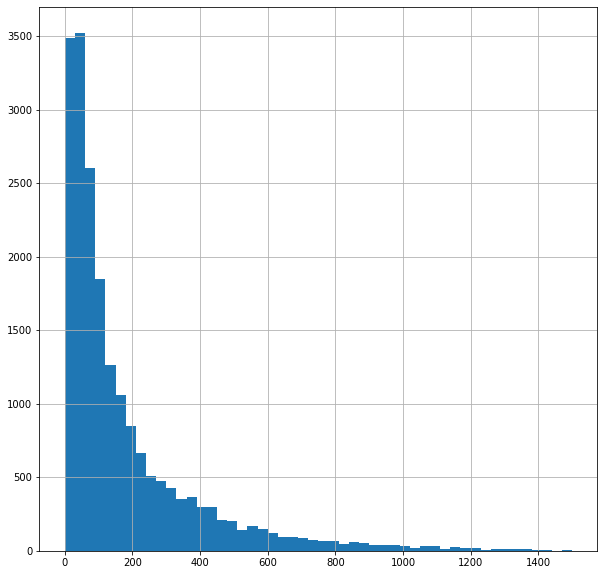

In [59]:
data['days_exposition'].hist(bins = 50, figsize = (10,10),  range = (0, 1500))
print(data['days_exposition'].describe())

(0.0, 600.0)

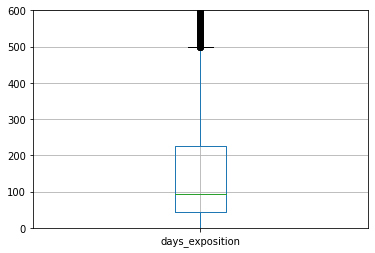

In [60]:
data.boxplot(column = 'days_exposition')
plt.ylim(0,600)

в среднем квартиры продаются за 50 - 200 дней. 
среднее значение времени продажи квартир 178 дней, медианное значение 94 дня. 
быстрыми продажи можно считать до 44 дней, необычно долгими более 226 дней. 

#### Определение факторов, от которых зависит цена

##### Зависимость от общей площади

0.7310200210684027

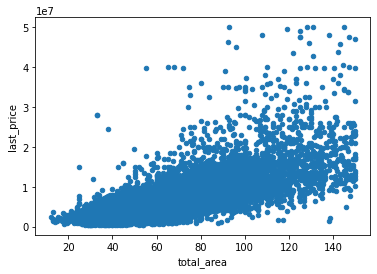

In [61]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter')
data['total_area'].corr(data['last_price'])

Зависимость присутсвует

##### Зависимость от жилой площади

0.6050271774199775

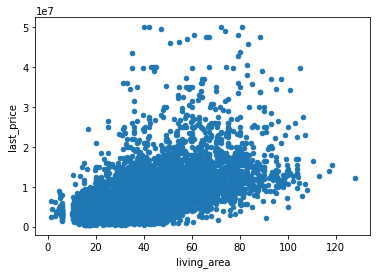

In [62]:
data.plot(x = 'living_area', y = 'last_price', kind = 'scatter')
data['living_area'].corr(data['last_price'])

Зависимость присутсвует

##### Зависимость цены от площади кухни

0.5707949220025983

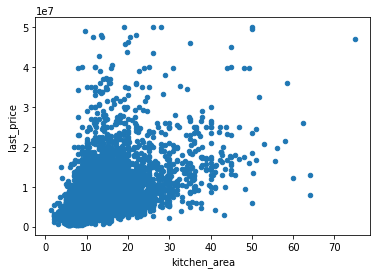

In [63]:
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter')
data['kitchen_area'].corr(data['last_price'])

Зависимость присутствует

##### Зависимость от количества комнат

0.42696166754671433

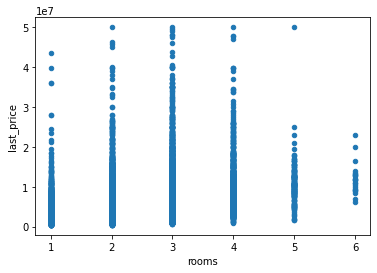

In [64]:
data.plot(x = 'rooms', y = 'last_price', kind = 'scatter')
data['rooms'].corr(data['last_price'])

Зависимость очень слабая

##### Зависимость от этажа, на котором расположена квартира (первый, последний, другой)

,last_price
floor_type,
другой,4780000.0
первый,3900000.0
последний,4200000.0


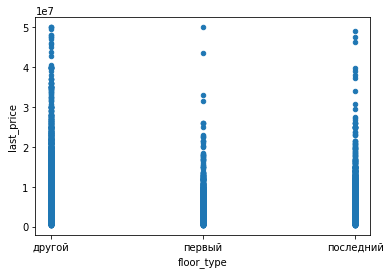

In [65]:
data.plot(x = 'floor_type', y = 'last_price', kind = 'scatter')
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')


Согласно полученным данным квартиры на первом этаже дешевле, а вот на последнем не значительно дешевле, чем на другиз этажах.

##### Зависимость от даты размещения.

In [66]:
piv1 = data.pivot_table(index = 'publ_month', values = 'last_price', aggfunc = 'median')
piv1

,last_price
publ_month,
1,4545000.0
2,4600000.0
3,4597500.0
4,4750000.0
5,4500000.0
6,4350000.0
7,4550000.0
8,4500000.0
9,4610000.0


Средняя цена мало зависит от месяца

In [67]:
data.pivot_table(index = 'publ_year', values = 'last_price', aggfunc = ['median', 'count'])

,median,count
,last_price,last_price
publ_year,,
2014,7100000.0,123
2015,5130000.0,1105
2016,4450000.0,2683
2017,4450000.0,7962
2018,4500000.0,8371
2019,5000000.0,2815


ежегодно стоимость с 14 по 18 год уменьшалась, это связано с тем, что со временем данный сервис становится более популярен в небольших городах, где стоимость квартир меньше, о чем говорит количество объявлений, в 2019 году скорее всего не за полный год данные.  

In [68]:
data.pivot_table(index = 'day_week', values = 'last_price', aggfunc = 'median')

,last_price
day_week,
0,4595000.0
1,4650000.0
2,4600000.0
3,4550000.0
4,4500000.0
5,4500000.0
6,4500000.0


от дней недели цена не зависит.

#### Стоимость кв. метра в самых населенных местах.

In [69]:
piv2 = data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc = ['mean', 'count'])
piv2.columns = ['mean_price', 'count']
piv2 = piv2.sort_values(by = 'count', ascending = False)
piv3 = piv2[0:11]
piv3

,mean_price,count
locality_name,,
Санкт-Петербург,111800.725730,15165
поселок Мурино,85681.762572,556
поселок Шушары,78677.364318,440
Всеволожск,68703.119723,397
Пушкин,102866.519694,359
Колпино,75333.295816,337
поселок Парголово,90332.262638,326
Гатчина,68746.146515,307
деревня Кудрово,92473.547559,299


In [70]:
piv3[piv3['mean_price'] == piv3['mean_price'].max()]

,mean_price,count
locality_name,,
Санкт-Петербург,111800.72573,15165


In [71]:
piv3[piv3['mean_price'] == piv3['mean_price'].min()]

,mean_price,count
locality_name,,
Выборг,58075.893915,235


Самая максимальная цена за 1 кв. м в Зеленогорске, самая минимальная цена в деревне Старополье. 

#### Как стоимость объектов зависит от расстояния до центра города.

In [72]:
spb = data[data['locality_name'] == 'Санкт-Петербург']
piv3 = spb.pivot_table(index = 'cityCenters_nearest_km', values = 'square_meter_price', aggfunc = 'mean')
piv3.head(10)

,square_meter_price
cityCenters_nearest_km,
0.0,224291.260556
1.0,147050.943272
2.0,139683.062296
3.0,119503.171083
4.0,127200.456421
5.0,135721.527844
6.0,140724.424567
7.0,140088.758027
8.0,123917.463580


In [73]:
spb['cityCenters_nearest_km'].corr(spb['square_meter_price'])

-0.3450382986281446

Корреляция показывает, что в Санкт-Петербурге чем (больше хата с краю) дальше от центра, тем ниже цена, но зависимость слабая.

### Общий вывод

<br>Отмечается значительный пик количества объявлений о продаже квартир около 45 кв метров. (стандартная площадь 2ух комнатных квартир около 45 кв.м.)
<br>Наиболее популярная площадь кухни около 10 кв.м
<br>Согласно данным в большинстве квартиры стоят от 3 млн.рублей до 7 млн.рублей
<br>Наиболее популярные объявления о продаже однокомнатных и двухкомнатных квартир.
<br>Самая часто встречающаяся высота потолков стандартные 2,6 - 2,7 м
<br>Самые популярные этажи для России до 5 этажа
<br>Соотношение объявлений о продаже квартир на первом и последнем этаже приблизительно равны.
<br>Самые популярные дома для России это безусловно пяти и девятиэтажки. 
<br>Наибольшее количество квартир находятся на расстоянии от 10 до 17 км от центра города.
<br>Наибольшее количество квартир находятся на расстоянии от 10 до 35 км от ближайшего аэропорта.
<br>Практически все квартиры находятся на расстоянии 500 м от парков.
<br>Наиболее часто люди задумываются о продаже квартир в конце зимы и начале весны, а летом и в начале осени им не до продажи квартир. в октябре ноябре предложение квартир увеличивается, однако на новогодние праздники сильно снижается. 
<br>в среднем квартиры продаются за 50 - 200 дней. среднее значение времени продажи квартир 178 дней, медианное значение 94 дня. быстрыми продажи можно считать до 44 дней, необычно долгими более 226 дней.
<br>ежегодно стоимость с 14 по 18 год уменьшалась, это связано с тем, что со временем данный сервис становится более популярен в небольших городах, где стоимость квартир меньше, о чем говорит количество объявлений, в 2019 году скорее всего не за полный год данные.
<br>В Выходные дни реже появляются объявления о продаже квартир. Вероятно, что большую часть объявлений выкладывают агенты по продаже квартир, у которых выходные в сб и вс
<br>Согласно полученным данным квартиры на первом этаже дешевле, а вот на последнем не значительно дешевле, чем на других этажах.
<br>Корреляция показывает, что в Санкт-Петербурге чем дальше от центра, тем ниже цена.